<a href="https://colab.research.google.com/github/AliARajabi/deep-learning/blob/main/RNN/text_Generation_Using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text generating using RNN

download text file 

It is shakespeare

In [ ]:
!wget https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt


--2021-04-15 16:33:59--  https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘shakespeare.txt’

shakespeare.txt     100%[===================>]   1.06M  --.-KB/s    in 0.01s   

2021-04-15 16:33:59 (104 MB/s) - ‘shakespeare.txt’ saved [1115394/1115394]



In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import text_to_word_sequence

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Read text file

In [ ]:
with open('/content/shakespeare.txt', "r") as f:
  text=f.read().lower()

In [ ]:
print(text[:50])

first citizen:
before we proceed any further, hear


Tokenizing text with two methode

first: (word_tokenize) 

it doesnot filter signs



In [ ]:
data=word_tokenize(text=text)

In [ ]:
print(data[:20])

['first', 'citizen', ':', 'before', 'we', 'proceed', 'any', 'further', ',', 'hear', 'me', 'speak', '.', 'all', ':', 'speak', ',', 'speak', '.', 'first']


In [ ]:


def filter_data(variable):
    sequence=['-','\’','!','”','#','$','%','&','(',')','*','+',',','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~','\t','\n']
    if (variable in sequence):
        return False
    else:
        return True

filtered = filter(filter_data,data)
data_2=list(filtered)

In [ ]:
print(data_2[:20])

['first', 'citizen', 'before', 'we', 'proceed', 'any', 'further', 'hear', 'me', 'speak', 'all', 'speak', 'speak', 'first', 'citizen', 'you', 'are', 'all', 'resolved', 'rather']


second: (text_to_word_sequence) 

it filters signs too

In [ ]:
data2=text_to_word_sequence(text)

In [ ]:
print(data2[:20])

['first', 'citizen', 'before', 'we', 'proceed', 'any', 'further', 'hear', 'me', 'speak', 'all', 'speak', 'speak', 'first', 'citizen', 'you', 'are', 'all', 'resolved', 'rather']


Filter stop word

In [ ]:
data_2=[word for word in data_2 if not word in ['-','.']]
Tokenize_data=[word for word in data_2 if not word in stopwords.words('english')]
Tokenize_data2=[word for word in data2 if not word in stopwords.words('english')]

In [ ]:
print(Tokenize_data[:20])
print(Tokenize_data2[:20])

['first', 'citizen', 'proceed', 'hear', 'speak', 'speak', 'speak', 'first', 'citizen', 'resolved', 'rather', 'die', 'famish', 'resolved', 'resolved', 'first', 'citizen', 'first', 'know', 'caius']
['first', 'citizen', 'proceed', 'hear', 'speak', 'speak', 'speak', 'first', 'citizen', 'resolved', 'rather', 'die', 'famish', 'resolved', 'resolved', 'first', 'citizen', 'first', 'know', 'caius']


In [ ]:
proces_data=" ".join(Tokenize_data)
proces_data2=" ".join(Tokenize_data2)

In [ ]:
print(proces_data[:50])
print(proces_data2[:50])

first citizen proceed hear speak speak speak first
first citizen proceed hear speak speak speak first


Checking if two string match to just use one of them

In [ ]:
diff1=[word for word in proces_data if not word in proces_data2]
diff2=[word for word in proces_data2 if not word in proces_data]
print(diff1)
print(diff2)
print(proces_data == proces_data2)
print(proces_data[:50])
print(proces_data2[:50])

['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '.', '.', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '.', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-',

A simple way to this step uisng re lib

In [ ]:
import re
words = re.split(r'\W+', text)
Tokenize_data3=[word for word in words if not word in stopwords.words('english')]
proces_data3=" ".join(Tokenize_data3)
print(proces_data3[:50])

first citizen proceed hear speak speak speak first


Another  simple way to this step uisng string lib

In [ ]:
words2 = text.split()
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in words2]
Tokenize_data4=[word for word in stripped if not word in stopwords.words('english')]
proces_data4=" ".join(Tokenize_data4)
print(proces_data4[:50])

first citizen proceed hear speak speak speak first


In [ ]:
diff3=[word for word in proces_data4 if not word in proces_data3]
print(diff3)
print(type(proces_data3))
print(proces_data3==proces_data4)


[]
<class 'str'>
False


In [ ]:
test=[word for word in proces_data if word.isalpha()]
test2=" ".join(test)

In [ ]:
d=[word for word in proces_data3 if not word in test2]

print(d)

['3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3']


# In next step we are going to make training dataes 
So we pick one of the result of above model personaly i think using (text_to_word_sequence) is better because it keeps " ' " that change the meaning of sentence

data=proces_data2

In [ ]:
Data=proces_data2

In this implementation we use character prediction

data to characters

I prefer to keep the space maybe model can figure out words

In [ ]:
chars=[char for char in Data]

In [ ]:
print(chars[:20])
print(len(chars))

['f', 'i', 'r', 's', 't', ' ', 'c', 'i', 't', 'i', 'z', 'e', 'n', ' ', 'p', 'r', 'o', 'c', 'e', 'e']
698670


Changing char to int

In [ ]:
vocab=sorted(set(chars))
print(len(vocab))
print(vocab)

29
[' ', "'", '3', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [ ]:
chr_to_vocab={char:id for id, char in enumerate(vocab)}
vocab_to_char={id:char for id, char in enumerate(vocab)}

In [ ]:
print(chr_to_vocab)

{' ': 0, "'": 1, '3': 2, 'a': 3, 'b': 4, 'c': 5, 'd': 6, 'e': 7, 'f': 8, 'g': 9, 'h': 10, 'i': 11, 'j': 12, 'k': 13, 'l': 14, 'm': 15, 'n': 16, 'o': 17, 'p': 18, 'q': 19, 'r': 20, 's': 21, 't': 22, 'u': 23, 'v': 24, 'w': 25, 'x': 26, 'y': 27, 'z': 28}


In [ ]:
int_char=[chr_to_vocab[i] for i in chars]

In [ ]:
print(int_char[:50])

[8, 11, 20, 21, 22, 0, 5, 11, 22, 11, 28, 7, 16, 0, 18, 20, 17, 5, 7, 7, 6, 0, 10, 7, 3, 20, 0, 21, 18, 7, 3, 13, 0, 21, 18, 7, 3, 13, 0, 21, 18, 7, 3, 13, 0, 8, 11, 20, 21, 22]


In [ ]:
from math import ceil
sequence_length=200
#batch_size=ceil(len(chars)/sequence_length)
batch_size=300
print("sequence length is:"+str(sequence_length))
print("batch size is:"+str(batch_size))

sequence length is:200
batch size is:300


In [ ]:
import numpy as np
import random
from keras.utils.np_utils import to_categorical 

def get_batches(data,sequence_length,vocab_len):
  npdata=np.array(data)/vocab_len
  batches=[]
  x_train=[npdata[i:i+sequence_length] for i in range(len(data)-sequence_length-1)]
  #x_trian2=[x_train[i]/vocab_len for i in range(len(x_trian))]
  y_train=[npdata[i+1:i+sequence_length+1] for i in range(len(data)-sequence_length-1)]
  batches=[(x,y) for x,y in zip(x_train,y_train)]

  random.shuffle(batches)

  xtrain=[x for (x,_) in batches]
  ytrain=[y for (_,y) in batches]

  return xtrain,ytrain


In [ ]:
xtrain,ytrain=get_batches(int_char,sequence_length,len(vocab))

In [ ]:
print(str(xtrain[0][:3])+str(xtrain[0][197:]))
print(str(ytrain[0][:3])+str(ytrain[0][197:]))

[0.10344828 0.68965517 0.31034483][0.5862069  0.55172414 0.75862069]
[0.68965517 0.31034483 0.24137931][0.55172414 0.75862069 0.10344828]


In [ ]:
X=[np.append(xtrain[i*batch_size],xtrain[i*batch_size+1:i*batch_size+batch_size])for i in range(int(len(int_char)/batch_size))]

In [ ]:
y=[np.append(ytrain[i*batch_size],ytrain[i*batch_size+1:i*batch_size+batch_size])for i in range(int(len(int_char)/batch_size))]

In [ ]:
print(len(X))
print(y[2327].shape)

2328
(60000,)


In [ ]:
if X[len(X)-1].shape[0] < batch_size*sequence_length:
  X = X[:-1]
  y = y[:-1]

In [ ]:
print(len(X))

2328


In [ ]:
X2=[np.reshape(X[i],(-1,sequence_length,1)) for i in range(len(X)-1)]
y2=[np.reshape(y[i],(-1,sequence_length,1)) for i in range(len(y)-1)]

In [ ]:
print(y2[0].shape)

(300, 200, 1)


In [ ]:
from tensorflow.keras.layers import Input,Embedding,LSTM,GlobalMaxPooling1D,Dense
from tensorflow.keras.models import  Model

def builed_model(vocab_size,sequence_len,batch_size,embedding_dim = 256,rnn_units = 1024):

  i = Input(shape=(sequence_len,))
  x = Embedding(vocab_size, embedding_dim)(i)
  x = LSTM(rnn_units, return_sequences=True)(x)
  #x = GlobalMaxPooling1D()(x)
  x = Dense(vocab_size)(x)

  model = Model(i, x)
  return model

In [ ]:
import tensorflow as tf
def build_model2(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, batch_input_shape=[batch_size, None]),
    LSTM(rnn_units, return_sequences=True, recurrent_initializer='glorot_uniform',recurrent_activation='sigmoid',stateful=True,), 
    #GlobalMaxPooling1D(),
    tf.keras.layers.Dense(vocab_size)
  ])

  return model

In [ ]:
stm=builed_model(len(vocab),sequence_length,batch_size,256,1024)

In [ ]:
stm2=build_model2(len(vocab), 256, 1024, batch_size)

In [ ]:
stm.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 256)          7424      
_________________________________________________________________
lstm (LSTM)                  (None, 200, 1024)         5246976   
_________________________________________________________________
dense (Dense)                (None, 200, 29)           29725     
Total params: 5,284,125
Trainable params: 5,284,125
Non-trainable params: 0
_________________________________________________________________


In [ ]:
stm2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (300, None, 256)          7424      
_________________________________________________________________
lstm_1 (LSTM)                (300, None, 1024)         5246976   
_________________________________________________________________
dense_1 (Dense)              (300, None, 29)           29725     
Total params: 5,284,125
Trainable params: 5,284,125
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test=stm(X2[0])

In [ ]:
print(type(test))
print(test.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'>
(300, 200, 29)


In [ ]:
test2=stm2(X2[0])

In [ ]:
print(type(test2))
print(test2.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'>
(300, 200, 29)


In [ ]:
los = tf.keras.losses.sparse_categorical_crossentropy(y2[0], test2, from_logits=True)

In [ ]:
print(los)

tf.Tensor(
[[3.3694773 3.370997  3.3720465 ... 3.3722966 3.3722966 3.3722966]
 [3.3694773 3.370997  3.3720465 ... 3.3722966 3.3722966 3.3722966]
 [3.3694773 3.370997  3.3720465 ... 3.3722966 3.3722966 3.3722966]
 ...
 [3.3694773 3.370997  3.3720465 ... 3.3722966 3.3722966 3.3722966]
 [3.3694773 3.370997  3.3720465 ... 3.3722966 3.3722966 3.3722966]
 [3.3694773 3.370997  3.3720465 ... 3.3722966 3.3722966 3.3722966]], shape=(300, 200), dtype=float32)


In [ ]:

loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
def compute_loss(labels, logits):
  loss = tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)
  # loss = tf.keras.losses.sparse_categorical_crossentropy('''TODO''', '''TODO''', from_logits=True) # TODO
  return loss
optimizer = tf.keras.optimizers.Adam()

In [ ]:
@tf.function
def train_step(x, y): 
  with tf.GradientTape() as tape:
    y_hat = stm2(x)
    loss = compute_loss(y, y_hat)
  grads = tape.gradient(loss, stm2.trainable_variables)
  optimizer.apply_gradients(zip(grads, stm2.trainable_variables))
  return loss

In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt

step_per_epoch=10
epoch=50

history = []

for i in range(epoch):
  idx = np.random.choice(len(X2), step_per_epoch)
  count=0
  for iter in idx:
    x_batch=X2[iter]
    y_batch = y2[iter]
    loss = train_step(x_batch, y_batch)
    history.append(loss.numpy().mean())
    print('traning on step {0} of cpoch {1}'.format(count,i))
    count+=1

stm2.save_weights('test.h5')
plt.plot(history)

traning on step 0 of cpoch 0
traning on step 0 of cpoch 0
traning on step 0 of cpoch 0
traning on step 0 of cpoch 0
traning on step 0 of cpoch 0
traning on step 0 of cpoch 0
traning on step 0 of cpoch 0
traning on step 0 of cpoch 0
traning on step 0 of cpoch 0
traning on step 0 of cpoch 0
traning on step 0 of cpoch 1
traning on step 0 of cpoch 1
traning on step 0 of cpoch 1
traning on step 0 of cpoch 1
traning on step 0 of cpoch 1
traning on step 0 of cpoch 1
traning on step 0 of cpoch 1
traning on step 0 of cpoch 1
traning on step 0 of cpoch 1
traning on step 0 of cpoch 1
traning on step 0 of cpoch 2
traning on step 0 of cpoch 2
traning on step 0 of cpoch 2
traning on step 0 of cpoch 2
traning on step 0 of cpoch 2
traning on step 0 of cpoch 2
traning on step 0 of cpoch 2
traning on step 0 of cpoch 2
traning on step 0 of cpoch 2
traning on step 0 of cpoch 2
traning on step 0 of cpoch 3
traning on step 0 of cpoch 3
traning on step 0 of cpoch 3
traning on step 0 of cpoch 3
traning on ste

KeyboardInterrupt: ignored

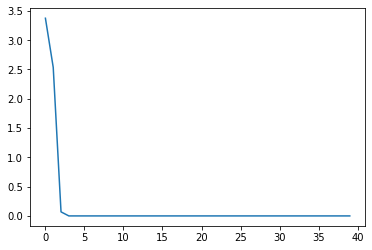

In [ ]:
stm2.save_weights('test.h5')
plt.plot(history)

In [ ]:
generator=build_model2(len(vocab), 256, 1024, 1)
generator.load_weights('test.h5')
generator.build(tf.TensorShape([1, None]))

generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (1, None, 256)            7424      
_________________________________________________________________
lstm_2 (LSTM)                (1, None, 1024)           5246976   
_________________________________________________________________
dense_2 (Dense)              (1, None, 29)             29725     
Total params: 5,284,125
Trainable params: 5,284,125
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def generate_text(model, start_string, generation_length=100):
  input_eval = [chr_to_vocab[s] for s in start_string] 
  input_eval = tf.expand_dims(input_eval, 0)
  text_generated = []
  model.reset_states()

  for i in range(generation_length):
      predictions = model(input_eval)
      predictions = tf.squeeze(predictions, 0)
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
      input_eval = tf.expand_dims([predicted_id], 0)
      text_generated.append(vocab_to_char[predicted_id]) 
  return (start_string + ''.join(text_generated))

In [ ]:
generated_text = generate_text(generator, start_string="romeo", generation_length=100)

In [ ]:
print(generated_text)

romeoseq                                                                                                 


# Using tensorflow datasets

In [1]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing

import numpy as np
import os
import time

reading data

In [2]:
file_path=tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1122304/1115394 [==============================] - 0s 0us/step


In [3]:
text = open(file_path, 'rb').read().decode(encoding='utf-8')

In [4]:
print(f'size of the input text is {len(text)}')

size of the input text is 1115394


In [5]:
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [6]:
vocab=sorted(set(text))

In [7]:
print(f'{len(vocab)} unique characters')

65 unique characters


functions for transition between char and ids

In [15]:
ids_from_chars = preprocessing.StringLookup(vocabulary=list(vocab))

In [16]:
chars_from_ids = tf.keras.layers.experimental.preprocessing.StringLookup(vocabulary=ids_from_chars.get_vocabulary(), invert=True)

In [17]:
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids),axis=-1)

transfer data's char to id

In [24]:
all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
all_ids

<tf.Tensor: shape=(1115394,), dtype=int64, numpy=array([20, 49, 58, ..., 47, 10,  2])>

cearting dataset

In [25]:
ids_dataset=tf.data.Dataset.from_tensor_slices(all_ids)
ids_dataset

<TensorSliceDataset shapes: (), types: tf.int64>

In [26]:
for ids in ids_dataset.take(10):
    print(chars_from_ids(ids).numpy().decode('utf-8'))

F
i
r
s
t
 
C
i
t
i


In [27]:
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)

slice dataset to sequences

In [28]:
sequences=ids_dataset.batch(batch_size=seq_length+1,drop_remainder=True)

In [29]:
for seq in sequences.take(1):
  print(chars_from_ids(seq))

tf.Tensor(
[b'F' b'i' b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':'
 b'\n' b'B' b'e' b'f' b'o' b'r' b'e' b' ' b'w' b'e' b' ' b'p' b'r' b'o'
 b'c' b'e' b'e' b'd' b' ' b'a' b'n' b'y' b' ' b'f' b'u' b'r' b't' b'h'
 b'e' b'r' b',' b' ' b'h' b'e' b'a' b'r' b' ' b'm' b'e' b' ' b's' b'p'
 b'e' b'a' b'k' b'.' b'\n' b'\n' b'A' b'l' b'l' b':' b'\n' b'S' b'p' b'e'
 b'a' b'k' b',' b' ' b's' b'p' b'e' b'a' b'k' b'.' b'\n' b'\n' b'F' b'i'
 b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':' b'\n' b'Y'
 b'o' b'u' b' '], shape=(101,), dtype=string)


slice dataset to x and y sequences

In [31]:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

In [33]:
dataset = sequences.map(split_input_target)

In [34]:
for input_example, target_example in dataset.take(1):
    print("Input :", text_from_ids(input_example).numpy())
    print("Target:", text_from_ids(target_example).numpy())

Input : b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target: b'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


Create training batches

In [35]:
BATCH_SIZE = 64
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

dataset

<PrefetchDataset shapes: ((64, 100), (64, 100)), types: (tf.int64, tf.int64)>

Build The Model

In [36]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [37]:
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x

In [39]:
model = MyModel(
    vocab_size=len(ids_from_chars.get_vocabulary()),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

In [40]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 67) # (batch_size, sequence_length, vocab_size)


In [41]:
model.summary()

Model: "my_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      multiple                  17152     
_________________________________________________________________
gru_1 (GRU)                  multiple                  3938304   
_________________________________________________________________
dense_1 (Dense)              multiple                  68675     
Total params: 4,024,131
Trainable params: 4,024,131
Non-trainable params: 0
_________________________________________________________________


In [43]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()
sampled_indices

array([11, 12, 56,  6,  9, 57,  5, 54, 59, 40, 34, 40, 17,  4,  8, 25, 37,
       28, 47, 46, 26, 20, 63, 53,  3, 37, 49, 27, 54, 21,  0, 41, 16, 19,
       23, 47, 30,  6, 47, 18, 28, 64,  5, 38, 58, 21, 24, 28, 11,  2, 21,
       58, 15, 39, 15, 36, 48, 65, 57, 32,  8, 31, 29, 40,  9, 53, 28,  0,
       60, 45, 38, 38, 15, 17, 55,  1, 28, 37, 38, 13, 37, 22, 66, 34, 25,
       26, 30, 26, 36, 16, 42, 40, 12, 16,  2, 12, 42, 48, 39, 51])

In [44]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy())

Input:
 b" a'\nvictory in his pocket? the wounds become him.\n\nVOLUMNIA:\nOn's brows: Menenius, he comes the thir"

Next Char Predictions:
 b'3:p&-q$nsZTZC!,KWNgfLFwm WiMnGaBEIgP&gDNx$XrGJN3\nGrAYAVhyqR,QOZ-mNteXXACo[UNK]NWX;WHzTKLPLVBbZ:B\n:bhYk'


Train the model

In [45]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [46]:
example_batch_loss = loss(target_example_batch, example_batch_predictions)
mean_loss = example_batch_loss.numpy().mean()
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("Mean loss:        ", mean_loss)

Prediction shape:  (64, 100, 67)  # (batch_size, sequence_length, vocab_size)
Mean loss:         4.2050505


A newly initialized model shouldn't be too sure of itself, the output logits should all have similar magnitudes. To confirm this you can check that the exponential of the mean loss is approximately equal to the vocabulary size. A much higher loss means the model is sure of its wrong answers, and is badly initialized:

In [47]:
tf.exp(mean_loss).numpy()

67.02398

In [48]:
model.compile(optimizer='adam', loss=loss)

In [51]:
# Directory where the checkpoints will be saved
checkpoint_dir = '/content/training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [49]:
EPOCHS = 20

In [52]:
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/20
172/172 [==============================] - 914s 5s/step - loss: 3.2850
Epoch 2/20
  7/172 [>.............................] - ETA: 14:36 - loss: 2.1613

KeyboardInterrupt: ignored

Generate text

In [53]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "" or "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['', '[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "" or "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states

In [54]:
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)

In [55]:
start = time.time()
states = None
next_char = tf.constant(['ROMEO:'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)

ROMEO:
I crsathid sirle my whave ure aid mathinglyo is of the menth sut ntour and le peratteris hestor I cabeat ware thas gither the broulllle.
Ther I goum, all tho ksce wiwh dic, I hant me soes will mo; surk peact and hith sa dore thing?

OREG:
Thire have not our hither meis tlay may
Richiniten's wise, there; I wioe wous Love reovy sootn?

There ame te thave dires.

Kit, me prvert.

CLORUNOS:
I lelly kid
Berlaed coartow anes famd ie fotuls s riprlectien hou beve faris;
Cofle fours thours moten-farso mid, of ipf of fore, hig.

ICESENL
DE:
Ande bryouchirndoue,
Now toy foak,
Torreare thou a lltirxe srenger'd srot?
The aitar airk dpating tove yourt thours myoul, ald; har tall? Mysellerd, cowlid sowe inovere, I sulenely hir be fos toeruthy thar dithy, bund cercerery, ay thea Hamly.
Sursed llatis, Cafin burandststoy cit pent, as siepen ke ortt ragnce totho weengrere faread, Memn,
St, en hathind's; myor to thenm
Yir ford enopsthes ald bugr to delly co ma-dein may, with prtiend?

TENOUS:
Oy I

In [56]:
start = time.time()
states = None
next_char = tf.constant(['ROMEO:', 'ROMEO:', 'ROMEO:', 'ROMEO:', 'ROMEO:'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result, '\n\n' + '_'*80)
print('\nRun time:', end - start)

tf.Tensor(
[b"ROMEO:\nMe coan fus hert.\n\nHONNIO:\nWhyowe hore he ther breato,\nBe tlond? And hay the heok, I hur, thilldwer ande treme,\nWhenw thet,\nWhalin galt\nMy ulowe dery and lir if and anff ingor?\nHomy hoth gat mone.\nBurpind cucpe-ceie'dod af af hirnder\nTith mabe meree-arith, that le if head\nPrreovevinswe'd swich it andule\nAs sirn.\nMame, ando moll nevit ney ande, so a pones thee agrr; him us fotr;\nAn the wireass.\nWhimn foog thin pawant tint ond frochereand it itear'd math itba bisting, mavenaren,\nIf this coulo co fime my cous selino, buld nopn not rot ourd, axe neom'; I'd, itben'ldt;\nThent ut los.\n\nDURENI:\nCot rishon-\nQUEETUUCEI:\nA brow mead.\n\nMARELI ELA:\nCorde,;\nI his noy stleme csoe it pris perry, meod;\nI de afof bo my gheidt toy garntocbersc; bpary hrent.\n\nVANK EOT INUK:\nMert.\nWher comey, to the, farant; and wang'led ods io gerrvathe spees!\n\nHill that I my revare, Mard; fis I's he as, heave\nHell Werenotingr bingadd he leno toverd tou rimerid.\nThe

Export the generator

In [57]:
tf.saved_model.save(one_step_model, 'one_step')
one_step_reloaded = tf.saved_model.load('one_step')

INFO:tensorflow:Assets written to: one_step/assets


INFO:tensorflow:Assets written to: one_step/assets


In [58]:
states = None
next_char = tf.constant(['ROMEO:'])
result = [next_char]

for n in range(100):
  next_char, states = one_step_reloaded.generate_one_step(next_char, states=states)
  result.append(next_char)

print(tf.strings.join(result)[0].numpy().decode("utf-8"))

ROMEO:
No karl feak.
Wyou; I'g teor corthy, ad wale pelivevord of so ruks pooe, atmer?
'st socher meadt, f


Advanced: Customized Training

In [59]:
class CustomTraining(MyModel):
  @tf.function
  def train_step(self, inputs):
      inputs, labels = inputs
      with tf.GradientTape() as tape:
          predictions = self(inputs, training=True)
          loss = self.loss(labels, predictions)
      grads = tape.gradient(loss, model.trainable_variables)
      self.optimizer.apply_gradients(zip(grads, model.trainable_variables))

      return {'loss': loss}

In [60]:
model = CustomTraining(
    vocab_size=len(ids_from_chars.get_vocabulary()),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

In [61]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [62]:
model.fit(dataset, epochs=1)

172/172 [==============================] - 902s 5s/step - loss: 2.7336


Or if you need more control, you can write your own complete custom training loop:

In [63]:
EPOCHS = 10

mean = tf.metrics.Mean()

for epoch in range(EPOCHS):
    start = time.time()

    mean.reset_states()
    for (batch_n, (inp, target)) in enumerate(dataset):
        logs = model.train_step([inp, target])
        mean.update_state(logs['loss'])

        if batch_n % 50 == 0:
            template = f"Epoch {epoch+1} Batch {batch_n} Loss {logs['loss']:.4f}"
            print(template)

    # saving (checkpoint) the model every 5 epochs
    if (epoch + 1) % 5 == 0:
        model.save_weights(checkpoint_prefix.format(epoch=epoch))

    print()
    print(f'Epoch {epoch+1} Loss: {mean.result().numpy():.4f}')
    print(f'Time taken for 1 epoch {time.time() - start:.2f} sec')
    print("_"*80)

model.save_weights(checkpoint_prefix.format(epoch=epoch))

Epoch 1 Batch 0 Loss 2.1924
Epoch 1 Batch 50 Loss 2.0344
Epoch 1 Batch 100 Loss 1.9313
Epoch 1 Batch 150 Loss 1.8792

Epoch 1 Loss: 1.9998
Time taken for 1 epoch 917.21 sec
________________________________________________________________________________
Epoch 2 Batch 0 Loss 1.8030
Epoch 2 Batch 50 Loss 1.7777
Epoch 2 Batch 100 Loss 1.6840
Epoch 2 Batch 150 Loss 1.6447

Epoch 2 Loss: 1.7179
Time taken for 1 epoch 903.79 sec
________________________________________________________________________________
Epoch 3 Batch 0 Loss 1.6089
Epoch 3 Batch 50 Loss 1.5718
Epoch 3 Batch 100 Loss 1.5399
Epoch 3 Batch 150 Loss 1.5081

Epoch 3 Loss: 1.5536
Time taken for 1 epoch 893.52 sec
________________________________________________________________________________
Epoch 4 Batch 0 Loss 1.4677
Epoch 4 Batch 50 Loss 1.4385
Epoch 4 Batch 100 Loss 1.4463
Epoch 4 Batch 150 Loss 1.4936

Epoch 4 Loss: 1.4534
Time taken for 1 epoch 908.19 sec
_________________________________________________________________

KeyboardInterrupt: ignored